<a href="https://colab.research.google.com/github/Pmilivojevic/Perspective-translation/blob/master/webCamColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display
from IPython.display import HTML, Audio, Image
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from base64 import b64decode
import IPython
import urllib.request
import cv2
import numpy as np
import io
from PIL import Image
import time

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # return the image
  return image

In [ ]:
imgPersp= take_photo()
imgPersp= cv2.cvtColor(imgPersp, cv2.COLOR_BGR2RGB)
imgPersp= cv2.resize(imgPersp, (512, 512), cv2.INTER_AREA)
R= cv2.getRotationMatrix2D((256, 256), 270, 1)
imgPersp= cv2.warpAffine(imgPersp, R, (512, 512))

<IPython.core.display.Javascript object>

In [ ]:
imgDest= take_photo()
imgDest= cv2.cvtColor(imgDest, cv2.COLOR_BGR2RGB)
imgDest= cv2.resize(imgDest, (512, 512), cv2.INTER_AREA)
R= cv2.getRotationMatrix2D((256, 256), 270, 1)
imgDest= cv2.warpAffine(imgDest, R, (512, 512))

<IPython.core.display.Javascript object>

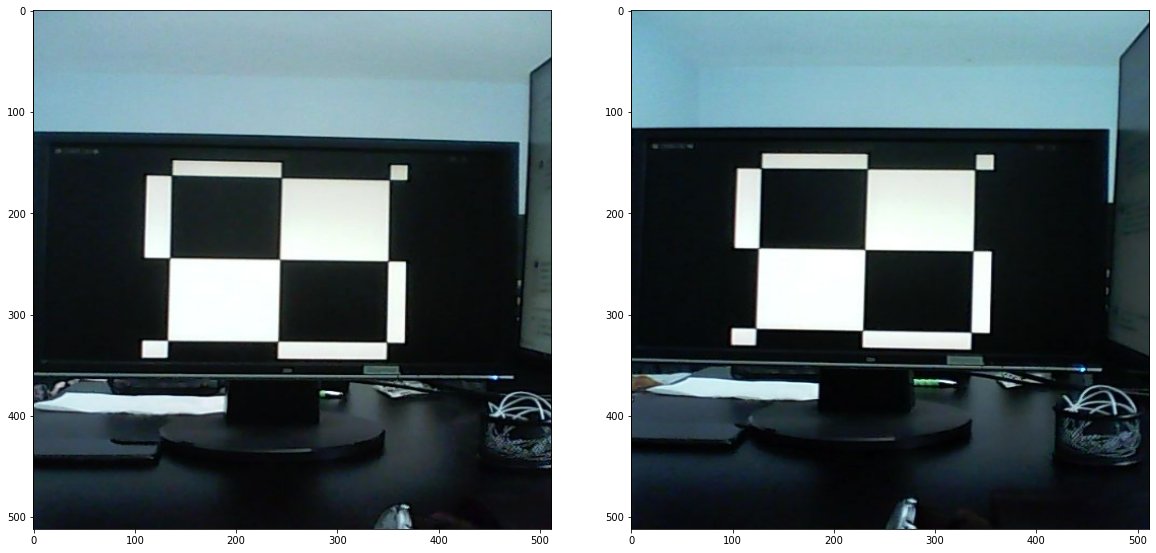

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 8))
f.tight_layout()
ax1.imshow(imgPersp)
ax2.imshow(imgDest)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
ret1, cornersPersp = cv2.findChessboardCorners(imgPersp, (3, 3), None)
if ret1:
    cv2.drawChessboardCorners(imgPersp, (3, 3), cornersPersp, ret1)
ret2, cornersDist = cv2.findChessboardCorners(imgDest, (3, 3), None)
if ret2:
    cv2.drawChessboardCorners(imgDest, (3, 3), cornersDist, ret2)

print(cornersPersp.shape())

AttributeError: ignored

In [ ]:
ptsPersp= np.array([[cornersPersp[6][0][0], cornersPersp[6][0][1]], [cornersPersp[3][0][0], cornersPersp[3][0][1]], [cornersPersp[0][0][0], cornersPersp[0][0][1]],
                    [cornersPersp[7][0][0], cornersPersp[7][0][1]], [cornersPersp[4][0][0], cornersPersp[4][0][1]], [cornersPersp[1][0][0], cornersPersp[1][0][1]],
                    [cornersPersp[8][0][0], cornersPersp[8][0][1]], [cornersPersp[5][0][0], cornersPersp[5][0][1]], [cornersPersp[2][0][0], cornersPersp[2][0][1]]])

ptsDest= np.array([[cornersDist[0][0][0], cornersDist[0][0][1]], [cornersDist[1][0][0], cornersDist[1][0][1]], [cornersDist[2][0][0], cornersDist[2][0][1]],
                   [cornersDist[3][0][0], cornersDist[3][0][1]], [cornersDist[4][0][0], cornersDist[4][0][1]], [cornersDist[5][0][0], cornersDist[5][0][1]], 
                   [cornersDist[6][0][0], cornersDist[6][0][1]], [cornersDist[7][0][0], cornersDist[7][0][1]], [cornersDist[8][0][0], cornersDist[8][0][1]]])

h, status = cv2.findHomography(ptsPersp, ptsDest)
imgTrans= cv2.warpPerspective(imgPersp, h, (imgDest.shape[1], imgDest.shape[0]))

TypeError: ignored

NameError: ignored

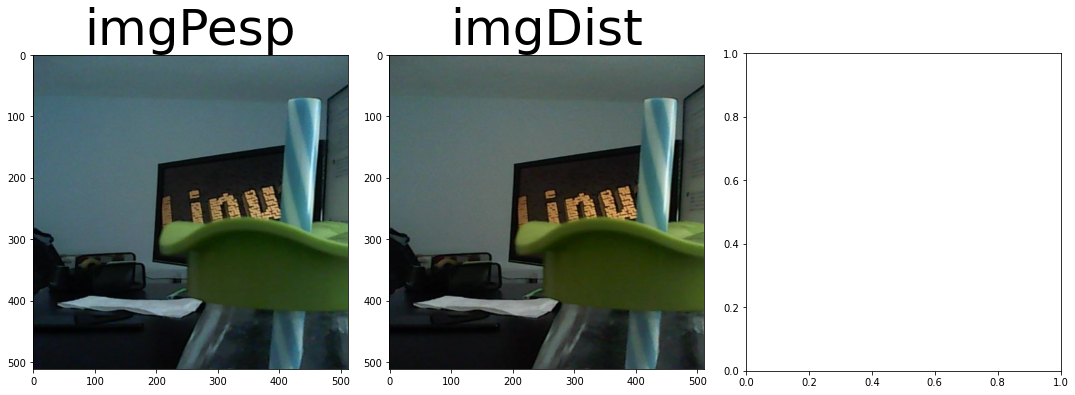

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15, 5))
f.tight_layout()
ax1.imshow(imgPersp, cmap= 'gray')
ax1.set_title('imgPesp', fontsize=50)
ax2.imshow(imgDest, cmap= 'gray')
ax2.set_title('imgDist', fontsize=50)
ax3.imshow(imgTrans, cmap= 'gray')
ax3.set_title('imgTrans', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)